# Multiple and Polynomial Regression

[Resource](https://harvard-iacs.github.io/2018-CS109A/labs/lab-4/solutions/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns

%matplotlib inline

# Learning Goals

* Implement arbitrary multiple regression models in both sklearn and statsmodels.
* Interpret the coefficient estimates produced by each model, including transformed and dummy variables.

`statsmodels` is focused on the **inference task**: guess good values for the betas and discuss how certain you are in those answers.

`sklearn` is focused on the **prediction task**: Given new data, guess what the response value is. As a result, `statsmodels` has lots of tools to discuss confidence, but isn't great at dealing with test sets. `sklearn` is great at test sets and validations, but can't really discuss uncertainty in the parameters or predictions. In short:
* `sklearn` is about putting a line through it and predicting new values using that line. If the line gives good predictions on the test set, who  cares about anything else?
* `statsmodels` assumes more about how the data were generated, and (if the assumptions are correct) can tell you about uncertainty in the results.

## Some terms
* **R-squared**: An interpretable summary of how well the model did. 1 is perfect, 0 is a trivial baseline model, negative is worse than the trivial model.
* **F-statistic**: A value testing whether we're likely to see these results (or even stronger ones) if none of the predictors actually mattered.
* **Prob (F-statistic)**: The probability that we'd see these results (or even stronger ones) if none of the predictors actually mattered. If this probability is small then either A) some combination of predictors actually matters of B) something rather unlikely has happened.
* **coef**: The estimate of each beta. This has several components:
    * **std err**: The amount we'd expect this value to wiggle if we re-did the data collection and re-ran our model. More data tends to make this wiggle smaller, but sometimes the collected data just isn't enough to pin down a particular value.
    * **t and P>|t|**: Similar to the F-statistic, these measure the probability of seeing coefficients this big (or even bigger) if the given variable didn't actually matter. Small probability doesn't necessarily mean the value matters.
    * **[0.025 0.975]**: Endpoints of the 95% confidence interval. This is an interval drawn in a clever way and which gives us an idea of where the true beta value might plausibly live.

# Part 1: Polynomial Regression, and Revisiting the Cab Data

In [3]:
cab_df = pd.read_csv("../data/dataset_1.txt")
train_data, test_data = train_test_split(cab_df, test_size=0.2, random_state=42)
cab_df.head()

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


In [4]:
cab_df.shape

(1250, 2)

In [13]:
# Do some data cleaning
X_train = train_data["TimeMin"].values.reshape(-1,1) / 60 # Convert to seconds
y_train = train_data["PickupCount"].values

X_test = test_data["TimeMin"].values.reshape(-1, 1) / 60 # Convert to seconds
y_test = test_data["PickupCount"].values


def plot_cabs(cur_model, poly_transformer=None):
    # Build the x values for the prediction
    x_vals = np.arange(0, 24,0.1).reshape(-1,1)

    # If needed, build the design matrix
    if poly_transformer:
        design_mat = poly_transformer.fit_transform(x_vals)
    else:
        design_mat = x_vals

    # Make the prediction at each x value
    prediction = cur_model.predict(design_mat)

    # Plot the prediction line and the test data
    plt.plot(x_vals, prediction, ".-", color="k", label="Prediction")
    plt.scatter(X_test, y_test, label="Test Data")

    # Plot labels
    plt.ylabel("Number of Taxi Pickups")
    plt.xlabel("Time of Day (Hours Past Midnight)")
    plt.legend()
    plt.show();

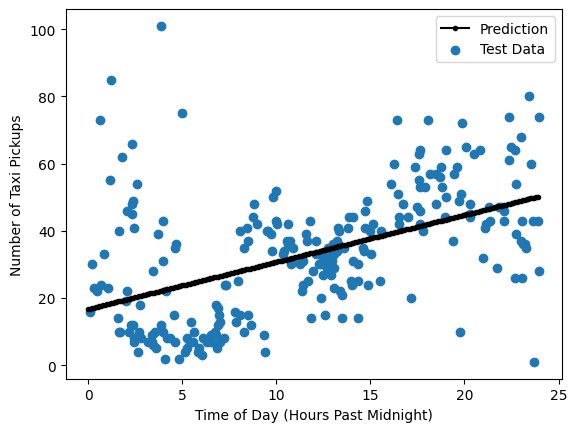

In [14]:
from sklearn.linear_model import LinearRegression

fitted_cab_model0 = LinearRegression().fit(X_train, y_train)
plot_cabs(fitted_cab_model0)

In [16]:
fitted_cab_model0.score(X_test, y_test)

0.240661535615741